# Closed $2\times2$ Economy with Intermediate Inputs and Nesting


|  Markets  |    X   |    Y   |    W    |       CONS   |
|:---------:|:------:|:------:|:-------:|:-----------: |      
|PX         |  120   | -20    |  -100   |              |
|PY         |  -20   |  120   |  -100   |              |
|PW         |        |        |   200   | -200         |
|PL         |  -40   |  -60   |         |  100         |
|PK         |  -60   |  -40   |         |  100         | 

In [1]:
using MPSGE_MP, JuMP

In [2]:
M = MPSGEModel()

@parameter(M, tax, 0)
@parameter(M, σ, .5)
@parameter(M, id, 120)

@sectors(M,begin
    X
    Y
    W
end)

@commodities(M,begin
    PX
    PY
    PL
    PK
    PW
end)

@consumer(M, CONS)


@production(M, X, [s = σ, t = 0, va => s = 1], begin
    @output PX id t reference_price = 1
    @input  PY 20 s
    @input  PL 40 va taxes = [Tax(CONS,tax)] # labor
    @input  PK 60 va taxes = [Tax(CONS,tax)] # machine
end)

@production(M, Y, [t = 0, s = .75, va => s = 1], begin 
    @output PY 120 t
    @input  PX 20 s
    @input  PL 60 va
    @input  PK 40 va
end)

@production(M, W, [t = 0, s = 1], begin
    @output PW 200 t
    @input  PX 100 s
    @input  PY 100 s
end)

@demand(M, CONS, begin
    @final_demand(PW, 200)
    end,begin
    @endowment(PL, 100)
    @endowment(PK,100)
end)

$Demand: CONS
    D: PW    Q: 200
    E: PL    Q: 100
    E: PK    Q: 100


# Benchmark

In [3]:
solve!(M; cumulative_iteration_limit = 0)
df_benchmark = generate_report(M)

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris

Preprocessed size   : 8

Crash Log
major  func  diff  size  residual    step       prox   (label)
    0     0             0.0000e+00             0.0e+00 (zero_profit[X)

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     1     1 0.0000e+00           I 0.0e+00 0.0e+00 (zero_profit[X)

Major Iterations. . . . 0
Minor Iterations. . . . 0
Restarts. . . . . . . . 0
Crash Iterations. . . . 0
Gradient Steps. . . . . 0
Function Evaluations. . 1
Gradient Evaluations. . 1
Basis Time. . . . . . . 0.000000
Total Time. . . . . . . 0.078000
Residual. . . . . . . . 0.000000e+00
Postsolved residual: 0.0000e+00


Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Default price normalization using income for CONS - This value is fixed. Unfix with unfix(CONS).

Row,var,value,margin
,GenericV…,Float64,Float64
1,Y,1.0,0.0
2,W,1.0,0.0
3,X,1.0,0.0
4,PL,1.0,0.0
5,PW,1.0,0.0
6,PK,1.0,0.0
7,PY,1.0,0.0
8,PX,1.0,0.0
9,CONS,200.0,0.0


# Counterfactual tax = .5

In [4]:
unfix(CONS)
fix(PW,1)

set_value!(tax,.5)

solve!(M; cumulative_iteration_limit = 10_000)
df = generate_report(M)

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris

Preprocessed size   : 8

Crash Log
major  func  diff  size  residual    step       prox   (label)
    0     0             5.4385e+01             0.0e+00 (income_balance[CONS)
    1     1     0     8 3.4976e+00  1.0e+00    0.0e+00 (zero_profit[W)
pn_search terminated: no basis change.

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     2     2 3.4976e+00           I 0.0e+00 3.0e+00 (zero_profit[W)
    1     1     3     3 2.4322e-02  1.0e+00 SO 0.0e+00 1.6e-02 (market_clearanc)
    2     1     4     4 2.5675e-06  1.0e+00 SO 0.0e+00 2.1e-06 (market_clearanc)
    3     1     5     5 9.1271e-14  1.0e+00 SO 0.0e+00 5.0e-14 (zero_profit[X)

Major Iterations. . . . 3
Minor Iterations. . . . 3
Restarts. . . . . . . . 0
Crash Iterations. . . . 1
Gradient Steps. . . . . 0
Function Evaluations. . 5
Gradient Evaluations. . 5
Basis Ti

Row,var,value,margin
,GenericV…,Float64,Float64
1,Y,1.10915,-1.42109e-14
2,W,0.983827,0.0
3,X,0.861867,-4.9738e-14
4,PL,0.841191,-2.84217e-14
5,PW,1.0,-5.68434e-14
6,PK,0.787062,2.84217e-14
7,PY,0.868686,-2.84217e-14
8,PX,1.15116,-4.26326e-14
9,CONS,196.765,-2.84217e-14


# Counterfactual tax = .1

In [5]:
fix(PW,1)

set_value!(tax,.1)

solve!(M)
df = generate_report(M)

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris

Preprocessed size   : 8

Crash Log
major  func  diff  size  residual    step       prox   (label)
    0     0             1.0248e+01             0.0e+00 (income_balance[CONS)
    1     1     0     8 1.5284e-01  1.0e+00    0.0e+00 (zero_profit[W)
pn_search terminated: no basis change.

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     2     2 1.5284e-01           I 0.0e+00 1.1e-01 (zero_profit[W)
    1     1     3     3 6.2993e-05  1.0e+00 SO 0.0e+00 4.2e-05 (market_clearanc)
    2     1     4     4 1.7011e-11  1.0e+00 SO 0.0e+00 1.3e-11 (market_clearanc)

Major Iterations. . . . 2
Minor Iterations. . . . 2
Restarts. . . . . . . . 0
Crash Iterations. . . . 1
Gradient Steps. . . . . 0
Function Evaluations. . 4
Gradient Evaluations. . 4
Basis Time. . . . . . . 0.000000
Total Time. . . . . . . 0.000000
Residual. . . . . . .

Row,var,value,margin
,GenericV…,Float64,Float64
1,Y,1.02732,-6.82121e-12
2,W,0.999102,-2.98428e-13
3,X,0.968548,-7.51754e-12
4,PL,0.960787,1.93268e-12
5,PW,1.0,-2.78817e-11
6,PK,0.945827,1.34577e-11
7,PY,0.967574,-8.3844e-13
8,PX,1.03351,0.0
9,CONS,199.82,4.83169e-13


In [6]:
fix(PW,1)

set_value!(σ,3)
set_value!(σ,100)

solve!(M)
df = generate_report(M)

Path 5.0.03 (Fri Jun 26 10:05:33 2020)
Written by Todd Munson, Steven Dirkse, Youngdae Kim, and Michael Ferris

Preprocessed size   : 8

Crash Log
major  func  diff  size  residual    step       prox   (label)
    0     0             1.4279e+02             0.0e+00 (market_clearance[PK)
    1     4     0     8 5.9485e+01  4.1e-01    0.0e+00 (market_clearance[PY)
pn_search terminated: no basis change.

Major Iteration Log
major minor  func  grad  residual    step  type prox    inorm  (label)
    0     0     5     2 5.9485e+01           I 0.0e+00 5.9e+01 (market_clearanc)
    1     1     6     3 4.1576e+00  1.0e+00 SM 0.0e+00 3.2e+00 (market_clearanc)
    2     1     7     4 1.8869e-02  1.0e+00 SO 0.0e+00 1.4e-02 (market_clearanc)
    3     1     8     5 1.8620e-05  1.0e+00 SO 0.0e+00 1.5e-05 (market_clearanc)
    4     1     9     6 2.1022e-12  1.0e+00 SO 0.0e+00 1.9e-12 (market_clearanc)

Major Iterations. . . . 4
Minor Iterations. . . . 4
Restarts. . . . . . . . 0
Crash Iterations. . .

Row,var,value,margin
,GenericV…,Float64,Float64
1,Y,1.72391,5.68434e-14
2,W,0.981912,0.0
3,X,1.09567,1.89182e-12
4,PL,1.11803,4.12115e-13
5,PW,1.0,6.53699e-13
6,PK,0.822616,6.82121e-13
7,PY,0.992062,4.40536e-13
8,PX,1.008,0.0
9,CONS,196.382,-1.13687e-13


# Testing some fancy plotting

In [7]:
using Plots



Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model Status: FEASIBLE_POINT

Solver Status: LOCALLY_SOLVED
Model St

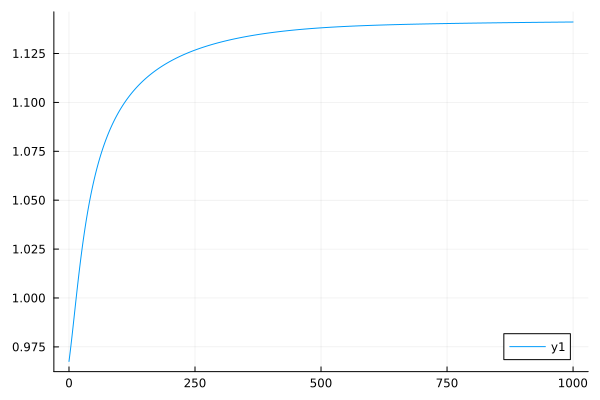

In [8]:
x_values = 0:1000
y_values = []

jm = jump_model(M)

set_silent(jm)

set_value!(tax, 0.1)
for sigma in x_values
    set_value!(σ, sigma)
    solve!(M)
    push!(y_values, value(X))
end

plot(x_values,y_values)